# Introduction to the IPython / Jupyter Notebook

Cells can run some code:

In [1]:
print("Hello world!")

Hello world!


Including multiple lines of code:

In [2]:
a = 5
b = 6
print(a / b)

0.8333333333333334


In [4]:
print(c)

The order of the cells doesn't really matter.


In [3]:
c = "The order of the cells doesn't really matter."

# Markdown cells can have headlines

## And sub headlines

##### And even lower levels

Also, you can *italicize* and **bold** text.

You can have links, [which look like this](http://www.google.com)

And even $\LaTeX$:

$$
\phi(x) = \frac{a}{x^b}
$$

Cell magics use '%%'

In [7]:
%%timeit
a = 1
for i in range(10**7):
    a += i
print(a)

49999995000001
49999995000001
49999995000001
49999995000001
1 loops, best of 3: 930 ms per loop


## Graphics

In [13]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

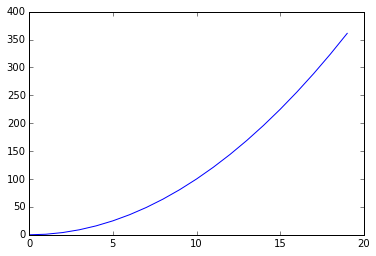

In [14]:
x_vals = range(20)
y_vals = [x**2 for x in x_vals]
plt.plot(x_vals, y_vals)

In [15]:
import numpy as np

In [ ]:
y = np.random.randn(1000)
y = y.cumsum()

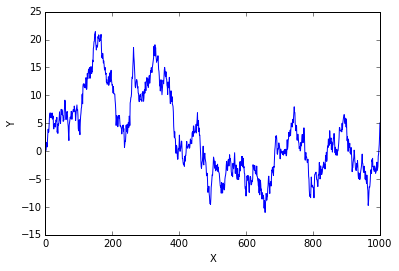

In [26]:
plt.plot(y)
plt.ylabel("Y")
plt.xlabel("X")

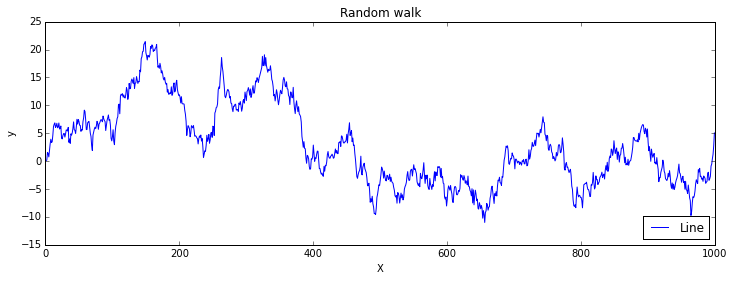

In [32]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

line = ax.plot(y)

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Random walk")

ax.legend(line, ["Line"], loc="lower right")

In [20]:
x = np.random.random(100)
y = np.random.randint(-100, 100, 100)

(array([ 12.,   4.,   9.,  11.,  11.,  10.,   7.,  10.,  11.,  15.]),
 array([ 0.0061594 ,  0.10267313,  0.19918687,  0.2957006 ,  0.39221434,
         0.48872807,  0.58524181,  0.68175554,  0.77826927,  0.87478301,
         0.97129674]),
 <a list of 10 Patch objects>)

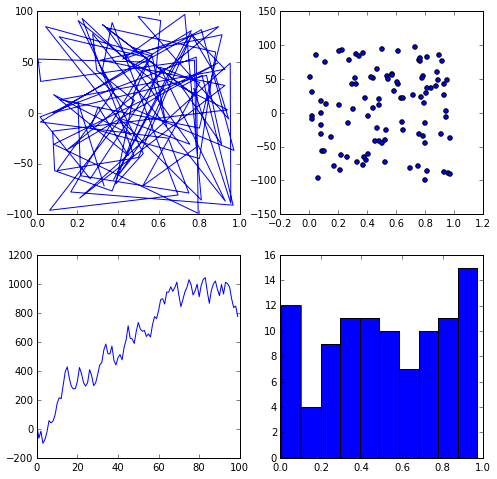

In [21]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x, y)
ax2.scatter(x, y)
ax3.plot(y.cumsum())
ax4.hist(x)


----



# pandas

https://www.ssa.gov/oact/babynames/limits.html

In [33]:
import pandas as pd

In [34]:
names14 = pd.read_csv("names/yob2014.txt")

In [35]:
names14.head()

,Emma,F,20799
0,Olivia,F,19674
1,Sophia,F,18490
2,Isabella,F,16950
3,Ava,F,15586
4,Mia,F,13442


In [93]:
names = pd.read_csv("names/yob2014.txt", names=["Name", "Sex", "Count"])

In [94]:
names.head()

,Name,Sex,Count
0,Emma,F,20799
1,Olivia,F,19674
2,Sophia,F,18490
3,Isabella,F,16950
4,Ava,F,15586


In [95]:
names.dtypes

Name     object
Sex      object
Count     int64
dtype: object

In [96]:
names[names.Sex=="M"].head(20)

,Name,Sex,Count
19067,Noah,M,19144
19068,Liam,M,18342
19069,Mason,M,17092
19070,Jacob,M,16712
19071,William,M,16687
19072,Ethan,M,15619
19073,Michael,M,15323
19074,Alexander,M,15293
19075,James,M,14301
19076,Daniel,M,13829


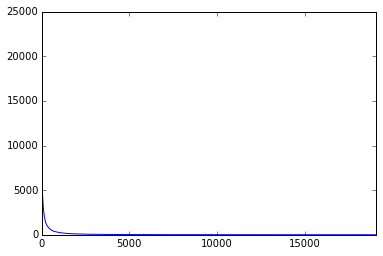

In [97]:
names[names.Sex=="F"].Count.plot()

In [98]:
names["Year"] = 2014

In [99]:
names.head()

,Name,Sex,Count,Year
0,Emma,F,20799,2014
1,Olivia,F,19674,2014
2,Sophia,F,18490,2014
3,Isabella,F,16950,2014
4,Ava,F,15586,2014


In [100]:
for year in range(1880, 2014):
    file_name = "names/yob" + str(year) + ".txt"
    df = pd.read_csv(file_name, names=["Name", "Sex", "Count"])
    df["Year"] = year
    names = names.append(df)

In [101]:
names[names.Year==1900].head()

,Name,Sex,Count,Year
0,Mary,F,16707,1900
1,Helen,F,6343,1900
2,Anna,F,6114,1900
3,Margaret,F,5306,1900
4,Ruth,F,4765,1900


In [152]:
hillaries = names[(names.Name=="Hillary") & (names.Sex=="F")]

In [159]:
hillaries.set_index("Year", inplace=True)

In [162]:
hillaries.sort_index(inplace=True)

/Users/dmasad/.virtualenvs/data-course/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


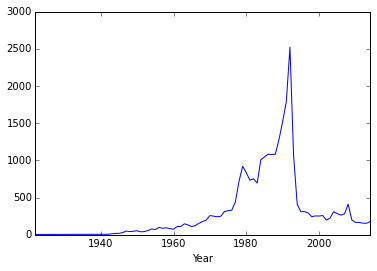

In [163]:
hillaries.Count.plot()

In [164]:
ashlies = names[names.Name=="Ashley"].copy()

In [168]:
ashlies = ashlies.pivot("Year", "Sex", "Count")

In [169]:
ashlies

Sex,F,M
Year,,
1880,NaN,8
1881,NaN,6
1882,NaN,7
1883,NaN,9
1884,NaN,6
1885,NaN,13
1886,NaN,14
1887,NaN,10
1888,NaN,7


In [170]:
ashlies.fillna(0, inplace=True)

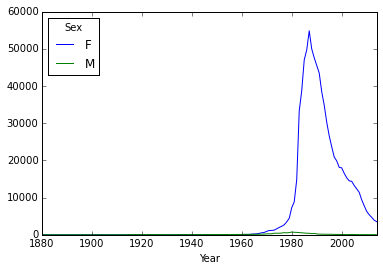

In [171]:
ashlies.plot()

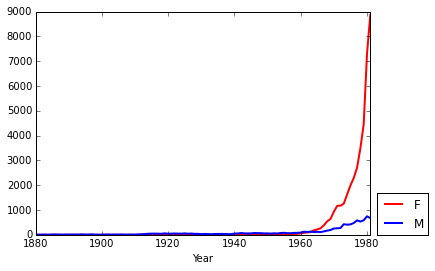

In [187]:
end_year = 1982
ashlies[ashlies.index < end_year]["F"].plot(color="red", lw=2)
ashlies[ashlies.index < end_year]["M"].plot(color="blue", lw=2)
plt.legend(loc=(1.02, 0))

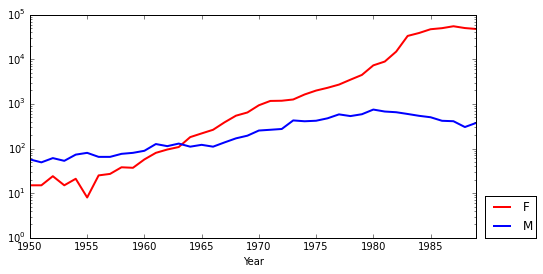

In [203]:
start_year=1950
end_year = 1990

fig, ax = plt.subplots(figsize=(8, 4))

ashlies[ashlies.index.isin(range(start_year, end_year))]["F"].plot(color="red", lw=2, ax=ax)
ashlies[ashlies.index.isin(range(start_year, end_year))]["M"].plot(color="blue", lw=2, ax=ax)
ax.legend(loc=(1.02, 0))
ax.set_yscale('log')

In [102]:
total_names = names.groupby(["Name", "Sex"]).aggregate(sum)

In [103]:
total_names.head()

,,Count,Year
Name,Sex,,
Aaban,M,72,14076
Aabha,F,21,6037
Aabid,M,5,2003
Aabriella,F,10,4022
Aadam,M,196,46051


In [104]:
total_names.xs("M", level="Sex").head()

,Count,Year
Name,,
Aaban,72,14076
Aabid,5,2003
Aadam,196,46051
Aadan,112,18087
Aadarsh,158,28095


In [105]:
total_names = total_names[["Count"]]

In [106]:
total_names.head()

,,Count
Name,Sex,
Aaban,M,72
Aabha,F,21
Aabid,M,5
Aabriella,F,10
Aadam,M,196


In [107]:
total_names.reset_index(inplace=True)

In [108]:
total_names.head()

,Name,Sex,Count
0,Aaban,M,72
1,Aabha,F,21
2,Aabid,M,5
3,Aabriella,F,10
4,Aadam,M,196


In [115]:
male_names = total_names[total_names.Sex=="M"].copy()

In [116]:
male_names.sort("Count", ascending=False, inplace=True)

In [117]:
male_names.head(10)

,Name,Sex,Count
41488,James,M,5105919
46150,John,M,5084943
80438,Robert,M,4796695
67713,Michael,M,4309198
99968,William,M,4055473
23014,David,M,3577704
46933,Joseph,M,2570095
79920,Richard,M,2555330
17257,Charles,M,2364332
94086,Thomas,M,2283080


In [124]:
male_names.index = range(1, len(male_names)+1)

In [125]:
male_names

,Name,Sex,Count
1,James,M,5105919
2,John,M,5084943
3,Robert,M,4796695
4,Michael,M,4309198
5,William,M,4055473
6,David,M,3577704
7,Joseph,M,2570095
8,Richard,M,2555330
9,Charles,M,2364332
10,Thomas,M,2283080


In [142]:
female_names = total_names[total_names.Sex=="F"].copy()

In [143]:
unisex_names = pd.merge(male_names, female_names, on="Name", suffixes=("_M", "_F"))

In [144]:
unisex_names.head()

,Name,Sex_M,Count_M,Sex_F,Count_F
0,James,M,5105919,F,23177
1,John,M,5084943,F,21647
2,Robert,M,4796695,F,20090
3,Michael,M,4309198,F,21607
4,William,M,4055473,F,15895


In [145]:
unisex_names = unisex_names[["Name", "Count_M", "Count_F"]]

In [146]:
unisex_names["Ratio"] = unisex_names.Count_M / (unisex_names.Count_M + unisex_names.Count_F)

In [147]:
unisex_names["Ratio"][unisex_names.Ratio>0.5] = 1 - unisex_names["Ratio"][unisex_names.Ratio>0.5] 

/Users/dmasad/.virtualenvs/data-course/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [150]:
unisex_names[unisex_names.Ratio==0.5]

,Name,Count_M,Count_F,Ratio
6424,Tkai,72,72,0.5
7089,Meco,43,43,0.5
7725,Najay,26,26,0.5
7818,Shondel,24,24,0.5
7864,Jacyn,23,23,0.5
7879,Kanari,23,23,0.5
7937,Annas,22,22,0.5
8152,Nellis,18,18,0.5
8218,Tobbie,17,17,0.5
8367,Tash,15,15,0.5


In [151]:
unisex_names[(unisex_names.Ratio > 0.49) & (unisex_names.Ratio < 0.51)]

,Name,Count_M,Count_F,Ratio
439,Kerry,49417,48452,0.495070
867,Kris,13792,13437,0.493481
1023,Unknown,9140,9283,0.496119
1070,Ivory,8186,8405,0.493400
1212,Baby,6034,5798,0.490027
1540,Michal,3620,3563,0.496032
1898,Kodi,2271,2362,0.490179
2167,Krishna,1715,1713,0.499708
2355,Christan,1403,1366,0.493319
2643,Teegan,1092,1055,0.491383
